In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from collections import Counter
#import tqdm
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

Welcome to JupyROOT 6.28/00


Info in <TUnixSystem::ACLiC>: creating shared library /home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti_cc.so


In [14]:
date = "JUN15"

chainSGN = ROOT.TChain("events")
chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018.root".format(date))
#chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1039_GFcat_Phi3Cat_2018.root".format(date))

df = ROOT.RDataFrame(chainSGN)

#D0Star

df = df.Define("HCandMassGen", "getHiggsPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, 421, 423, 25, 22, 25)[3]")\
    .Define("HCandMassGen3Body", "getHiggsPtEtaPhiMD0Star(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother)[3]")

#Phi3

#df = df.Define("HCandMassGen", "getHiggsPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, 333, 25, 22, 25)[3]")



date = "JUN13"

chainBKG = ROOT.TChain("events")
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc10_GFcat_D0StarCat_2018.root".format(date))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc11_GFcat_D0StarCat_2018.root".format(date))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc12_GFcat_D0StarCat_2018.root".format(date))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc13_GFcat_D0StarCat_2018.root".format(date))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc14_GFcat_D0StarCat_2018.root".format(date))
dg = ROOT.RDataFrame(chainBKG)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


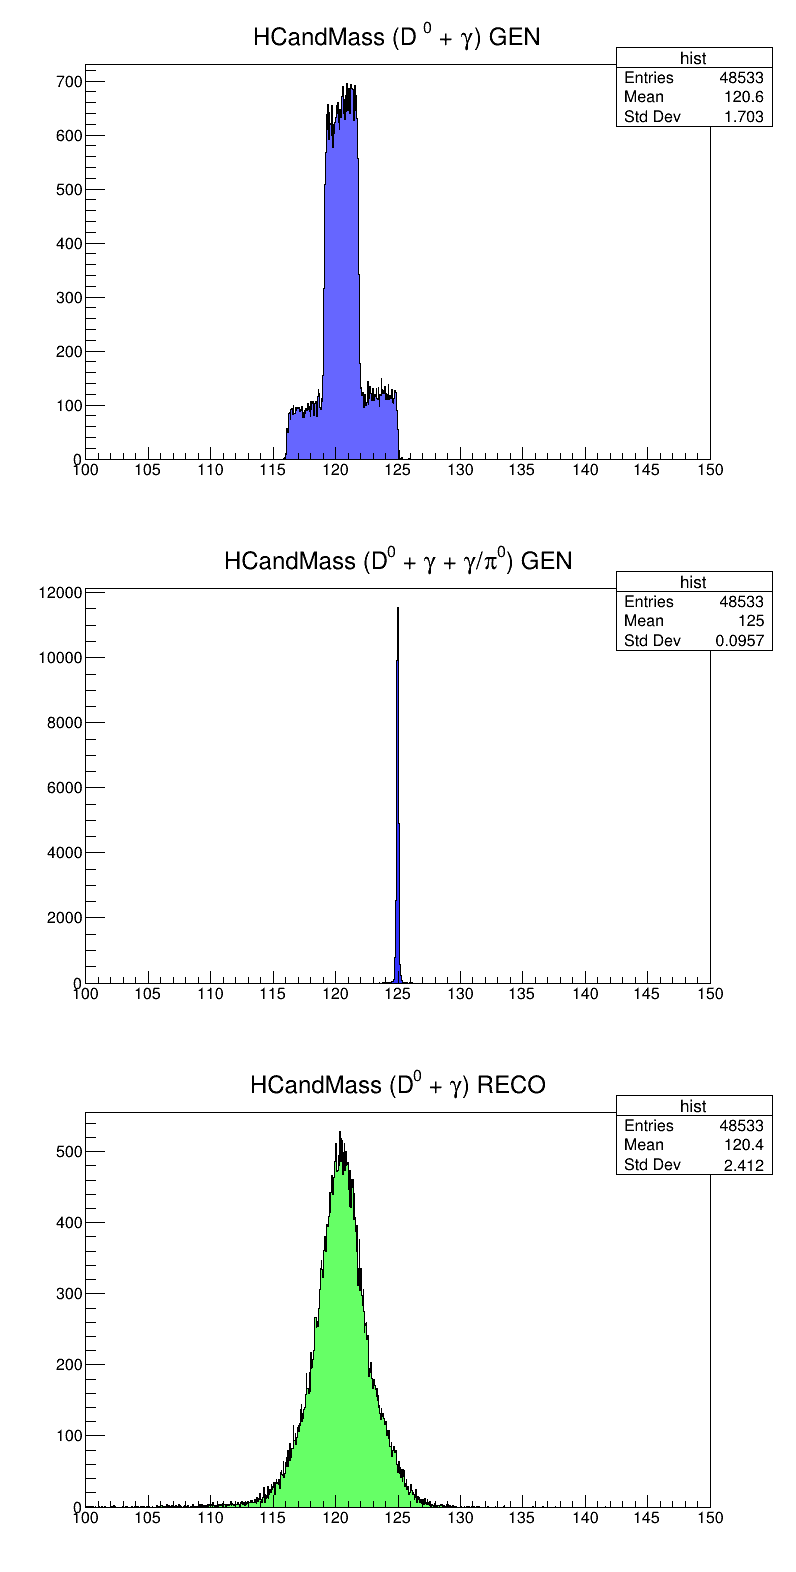

In [15]:
canvas = ROOT.TCanvas("canvas", "canvas", 800, 1600)

canvas.Divide(1, 3)

bins, xlow, xhigh = 1000, 100, 150

h1=df.Histo1D(("hist", "HCandMass (D^{0} + #gamma) GEN", bins, xlow, xhigh),"HCandMassGen")

h2=df.Histo1D(("hist", "HCandMass (D^{0} + #gamma + #gamma/#pi^{0}) GEN", bins, xlow, xhigh),"HCandMassGen3Body")

h3=df.Histo1D(("hist", "HCandMass (D^{0} + #gamma) RECO", bins, xlow, xhigh),"HCandMass")

h1.SetFillColor(ROOT.kBlue-7)
h1.SetLineColor(ROOT.kBlack)
h2.SetFillColor(ROOT.kBlue-4)
h2.SetLineColor(ROOT.kBlack)
h3.SetFillColor(ROOT.kGreen-7)
h3.SetLineColor(ROOT.kBlack)

canvas.cd(1)
h1.Draw("hist")
canvas.cd(2)
h2.Draw("hist")
canvas.cd(3)
h3.Draw("hist")

canvas.Draw()